# Lego World Map

Code inspired from Milan Janosov to create a stylized elevation map of the world.

You can read about his work creating a Lego elevation map of Budapest [here](https://open.substack.com/pub/milanjanosov/p/lego-elevation-map?r=3mp6w8&utm_medium=ios) on his Substack.

## Imports

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.merge import merge
import rasterio as rio
from rasterio.io import MemoryFile
from rasterio.enums import Resampling
import sys
import subprocess
import glob
import string
from osgeo import gdal
from pathlib import Path
import os

DEM Raster data sourced from here:

https://earthexplorer.usgs.gov

## Merge DEMs

In [ ]:
# adapted from https://gis.stackexchange.com/questions/449569/\
# merging-a-large-number-of-geotiff-files-via-gdal-merge-py

# paths
input_folder=Path('../_data/dem_tile_world_gtopo30')
output_folder=Path('../_data')
output_file=output_folder / "dem_world_gtopo30.tiff"
vrt_file=output_folder / "merged.vrt"

# create output folder if it doesn't exist
output_folder.mkdir(parents=True, exist_ok=True)

# find and list all .tif files
input_files = [Path(file) for file in glob.glob(str(input_folder / '*.tif'))]
print(f"Found {len(input_files)} files to merge.")

# dictionary for temporary short names
# to manage potentially long filenames
original_names = {}
characters = string.digits + string.ascii_letters

# temporarily rename files to short names
print("Renaming files temporarily...")
for i, file in enumerate(input_files):
    new_name = f"{characters[i % len(characters)]}{characters[i // len(characters)]}.t"
    new_path = file.parent / new_name
    file.rename(new_path)
    original_names[new_path] = file

# build VRT from renamed files
print("Building VRT file...")
gdal.BuildVRT(str(vrt_file), [str(file) for file in original_names.keys()])

# translate VRT to TIFF
print("Translating VRT to TIFF...")
gdal.Translate(str(output_file), str(vrt_file))

# restore original file names
print("Restoring original file names...")
for new_path, original_path in original_names.items():
    new_path.rename(original_path)

# clean up VRT file
print("Cleaning up temporary files...")
vrt_file.unlink()

print(f"Merging completed. Final output located at: {output_file}")

In [44]:
# from https://gis.stackexchange.com/questions/449569/\
# merging-a-large-number-of-geotiff-files-via-gdal-merge-py

# Find all files with a .tif extension
print('Finding files...')
input_files = glob.glob('../_data/dem_tile_world_gtopo30/*.tif')
print(input_files)

# Define the output file
output_file = "dem_world_gtopo30.tiff"

# Create a dictionary to store the original file names as keys and new short file names as values
original_names = {}

# Create list of characters (numbers and letters) to use for unique file names
characters = string.digits + string.ascii_letters
j = 0
# Rename all the files in the current directory to have unique short names of 2 characters
print('Renaming files...')
for i, file in enumerate(input_files):
    new_name = ''.join(characters[i%len(characters)] + characters[i//len(characters)] + ".t")
    # Check if the new name already exists, ignoring the case
    while os.path.exists(new_name) or new_name.lower() in [f.lower() for f in os.listdir()]:
        i += 1
        new_name = ''.join(characters[i%len(characters)] + characters[i//len(characters)] + ".t")
    os.rename(file, new_name)
    original_names[new_name] = file
    input_files[j] = new_name
    j += 1

input_string = " ".join(input_files)

#Build VRT from input files 
print('Building VRT file...')
vrt_file = "merged.vrt"
gdal.BuildVRT(vrt_file,input_files)

# Translate VRT to TIFF
print('Translating VRT to TIFF...')
gdal.Translate(output_file,vrt_file)

# Get output path
output_file_path=os.path.abspath(output_file)
print(f'Location of merged TIFF file: {output_file_path}')

# Rename the files back to their original names
print('Renaming files back to their original...')
for new_name, original_name in original_names.items():
    os.rename(new_name, original_name)

# remove the vrt file
print('Removing VRT file...')
os.remove(vrt_file)

print('Done!')

Finding files...
['../_data/dem_tile_world_gtopo30/gt30w060s60.tif', '../_data/dem_tile_world_gtopo30/gt30e060s10.tif', '../_data/dem_tile_world_gtopo30/gt30w140s10.tif', '../_data/dem_tile_world_gtopo30/gt30w020n90.tif', '../_data/dem_tile_world_gtopo30/gt30e100n90.tif', '../_data/dem_tile_world_gtopo30/gt30w020n40.tif', '../_data/dem_tile_world_gtopo30/gt30e100n40.tif', '../_data/dem_tile_world_gtopo30/gt30e020n40.tif', '../_data/dem_tile_world_gtopo30/gt30w100n40.tif', '../_data/dem_tile_world_gtopo30/gt30w180n90.tif', '../_data/dem_tile_world_gtopo30/gt30w180n40.tif', '../_data/dem_tile_world_gtopo30/gt30e060s60.tif', '../_data/dem_tile_world_gtopo30/gt30e020n90.tif', '../_data/dem_tile_world_gtopo30/gt30w100n90.tif', '../_data/dem_tile_world_gtopo30/gt30w060s10.tif', '../_data/dem_tile_world_gtopo30/gt30e140s10.tif', '../_data/dem_tile_world_gtopo30/gt30w180s60.tif', '../_data/dem_tile_world_gtopo30/gt30w140n40.tif', '../_data/dem_tile_world_gtopo30/gt30e060n40.tif', '../_data/dem

In [45]:
# move file to new folder
print(f'{output_file_path}')
output_file_path=Path(output_file_path).resolve()
print(f'Original location of merged TIFF file: {output_file_path}')
destination=Path('../_data/dem_world_gtopo30.tiff').resolve()
output_file_path.rename(destination)
if destination.is_file():
    print('Moving file was successful')
    print(f'New location: {destination}')
else:
    print('File move was unsuccessful.')

/Users/sra/files/projects/lego_world_map/dem_world_gtopo30.tiff
Original location of merged TIFF file: /Users/sra/files/projects/lego_world_map/dem_world_gtopo30.tiff
Moving file was successful
New location: /Users/sra/files/projects/_data/dem_world_gtopo30.tiff


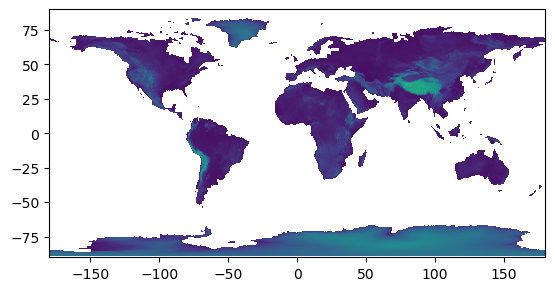

<Axes: >

In [29]:
# view file
fp=r'../_data/dem_world_gtopo30.tiff'
img=rio.open(fp)
show(img)

Saved image to ../_figs/dem_world.jpg


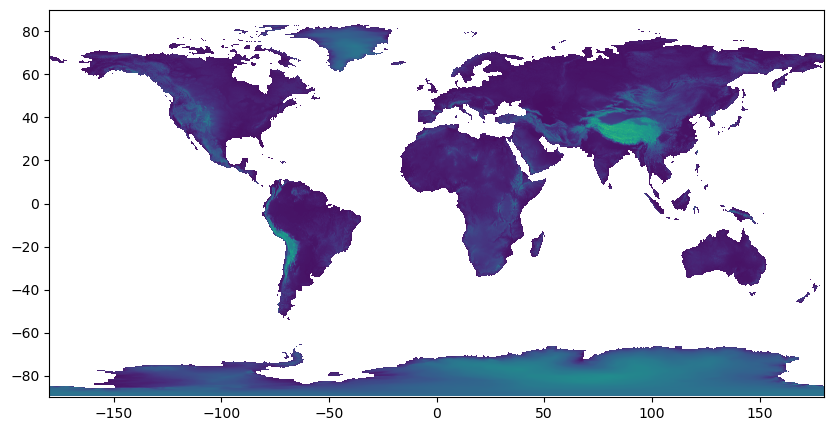

In [46]:
# save as jpg for posterity

# define paths
tiff_file=Path('../_data/dem_world_gtopo30.tiff')
output_image=Path('../_figs/dem_world.jpg')
output_image.parent.mkdir(parents=True,exist_ok=True)

# open and save as jpg
with rio.open(tiff_file) as src:
    fig,ax = plt.subplots(figsize=(10, 10))
    show(src,ax=ax)
    plt.savefig(output_image,format="jpg",dpi=300,bbox_inches='tight',pad_inches=0.1)
    
print(f'Saved image to {output_image}')

## Old

In [4]:
# import elevation file
gdf=gpd.read_file('../_data/world_elevation_custom.json')

print(len(gdf))
gdf.head()

177


,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,5,Costa Rica,CRI,0,2,Sovereign country,1,Costa Rica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRI.geojson,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
1,Admin-0 country,1,5,Nicaragua,NIC,0,2,Sovereign country,1,Nicaragua,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIC.geojson,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
2,Admin-0 country,1,5,Haiti,HTI,0,2,Sovereign country,1,Haiti,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTI.geojson,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
3,Admin-0 country,1,5,Dominican Republic,DOM,0,2,Sovereign country,1,Dominican Republic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DOM.geojson,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
4,Admin-0 country,1,6,El Salvador,SLV,0,2,Sovereign country,1,El Salvador,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SLV.geojson,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."


In [7]:
gdf.columns

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_id', 'fclass_pl', 'fclass_gr', 'fclass_it', 'fclass_nl',
       'fclass_se', 'fclass_bd', 'fclass_ua', 'filename', 'geometry'],
      dtype='object', length=170)

In [ ]:
gdf['']

KeyError: 'DN'

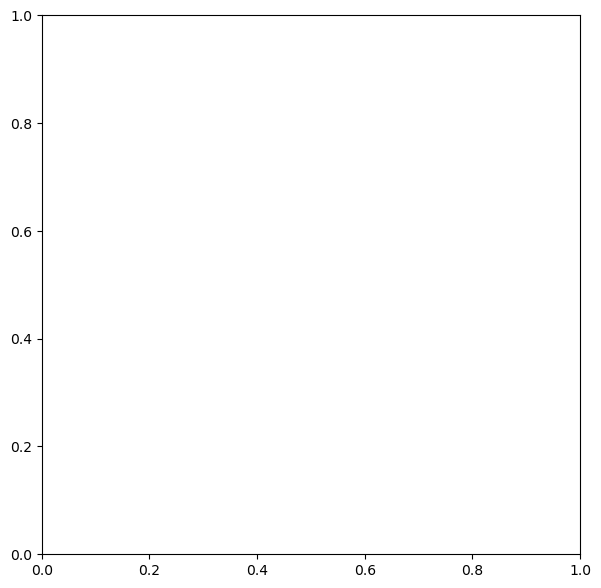

In [6]:
f,ax=plt.subplots(1,1,figsize=(20,7))
gdf.plot(column='e',ax=ax,cmap='terrain')